# KNN notebook

Contains:
- Build the KNN model from scratch in Python.
- Test train performance of the model.
- Find the ideal value for k.
- Plots with sklearn for classification boundary plots.

In [84]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


iris = datasets.load_iris()

idx = iris.target != 0 # filter out first class -> make it a binary classification problem.
X = iris.data[idx]
y = iris.target[idx]

In [85]:
class KNN:
    def __init__(self, k: int, objective: str):
        self.k = k
        self.objective = objective

        self.x = None
        self.y = None

    def train(self, x, y):
        self.x = x
        self.y = y
    

    def euclidean_distance(self, p, q):
        distance = 0
        for p_i, q_i in zip(p, q):
            distance += (p_i - q_i) ** 2
        return math.sqrt(distance)
    

    def predict(self, x):
        distances = [
            (
                self.euclidean_distance(x, x_i),
                y_i,
            )
            for x_i, y_i in zip(self.x, self.y)
        ]

        k_closest = sorted(distances)[:self.k]
        labels = [label for dist, label in k_closest]
        
        if self.objective == "classification":
            return Counter(labels).most_common()[0][0]
        elif self.objective == "regression":
            return sum(labels) / len(labels)

In [114]:
# Set up KNN model
knn = KNN(k=10, objective="classification")
knn.train(X, y)

In [115]:
# Test the train accuracy of the model
def find_accuracy(model, X, y, set_type="Train"):
    correct = 0
    for x_i, y_i in zip(X, y):
        y_p = model.predict(x_i)
        if y_p == y_i:
            correct += 1

    return correct / len(y)

## Test various k values

In [107]:
# Split values in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
test_accuracy, train_accuracy = [], []
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
for k in k_values:
    knn = KNN(k=k, objective="classification")
    knn.train(X_train, y_train)
    
    train_acc = find_accuracy(knn, X_train, y_train, set_type="Train")
    test_acc = find_accuracy(knn, X_test, y_test, set_type="Test")
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


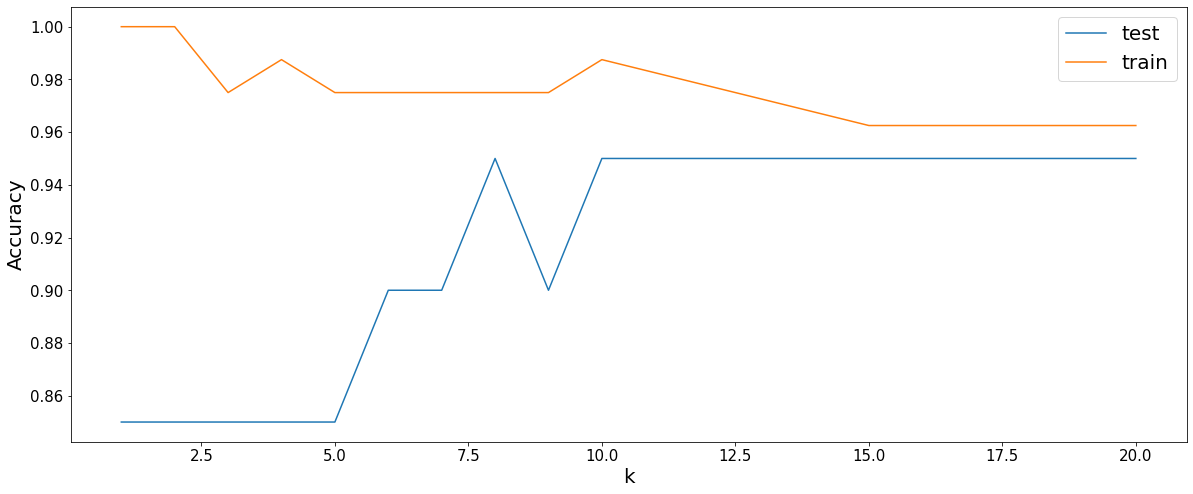

In [152]:
plt.figure(figsize=(20,8))
plt.plot(k_values, test_accuracy, label="test")
plt.plot(k_values, train_accuracy, label="train")
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(prop={"size": 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("images/accuracy_vs_k.png", bbox_inches = "tight", pad_inches = 0.1)

## Classification boundary plot 

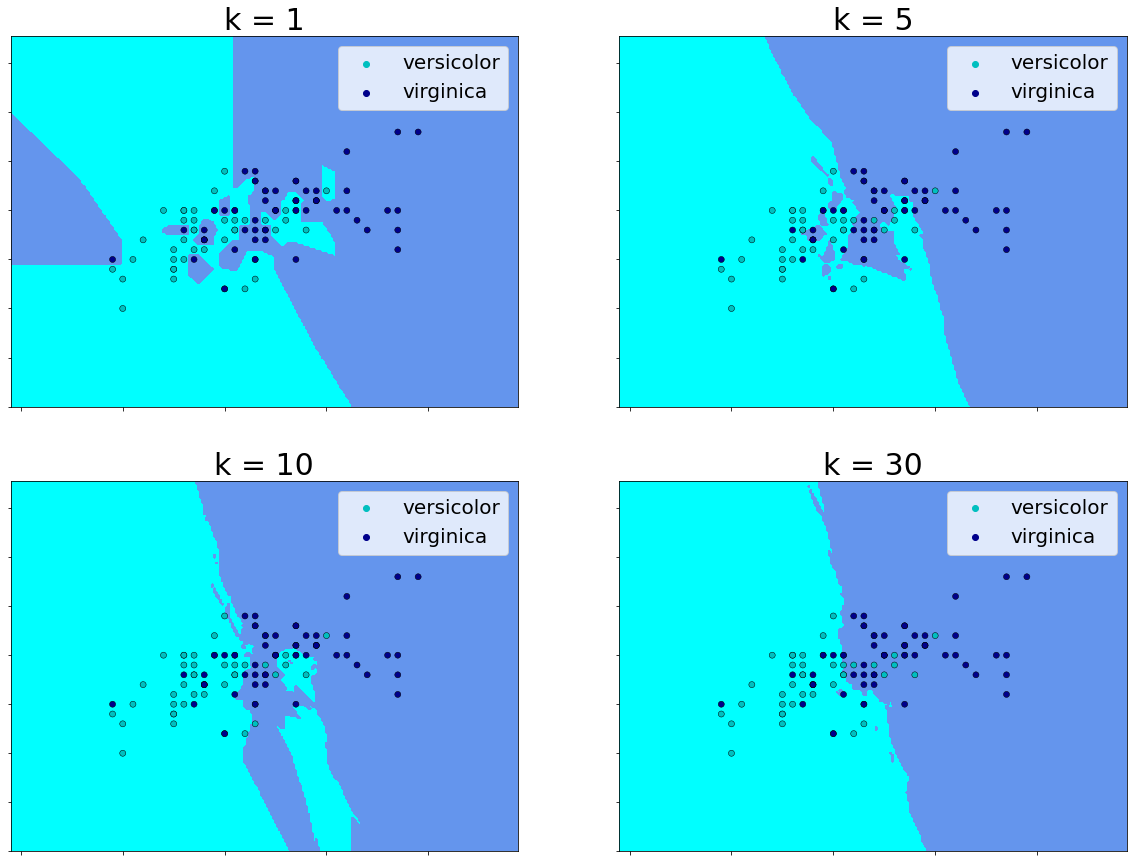

In [143]:
iris = datasets.load_iris()
idx = iris.target != 0

X = iris.data[idx][:, :2]
y = iris.target[idx]

h = 0.02

cmap_light = ListedColormap(["cyan", "cornflowerblue"])
cmap_bold = ["c", "darkblue"]
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 15)

for p, n_neighbors in zip([axs[0,0], axs[0,1], axs[1,0], axs[1,1]],[1, 5, 10, 30]):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    p.contourf(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
        ax=p
    )
    p.set_title(
        f"k = {n_neighbors}", fontdict={"fontsize": 30}
    )
    p.legend(prop={"size": 20})
    
for ax in fig.get_axes():
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.savefig("images/decision_boundary_knn.png", bbox_inches = "tight", pad_inches = 0.1)